# Experiment Evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

## E1: Effect of choosing the correct graph prior on DiBS performance

In [2]:
e1_results = pd.read_csv("experiment_results/e1_results_n100.csv")
e1_results["Data Type/Graph Model"] = e1_results["Data Type"] + "/" + e1_results["Graph Model"]
e1_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Network                40 non-null     int64  
 1   Data Type              40 non-null     object 
 2   Graph Model            40 non-null     object 
 3   ESHD                   40 non-null     float64
 4   AUROC                  40 non-null     float64
 5   NegLL                  40 non-null     float64
 6   Data Type/Graph Model  40 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.3+ KB


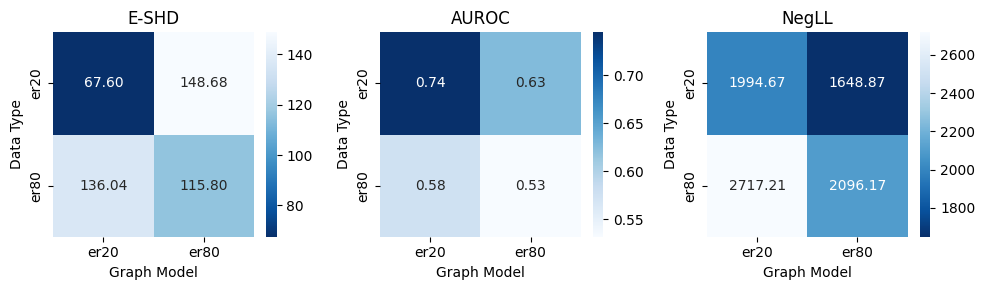

In [3]:
import seaborn as sns

# Pivot the data for heatmap visualization
e1_pivot_es = e1_results.pivot_table(index="Data Type", columns="Graph Model", values="ESHD")
e1_pivot_auroc = e1_results.pivot_table(index="Data Type", columns="Graph Model", values="AUROC")
e1_pivot_negll = e1_results.pivot_table(index="Data Type", columns="Graph Model", values="NegLL")

# Create heatmaps
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

sns.heatmap(e1_pivot_es, annot=True, fmt=".2f", cmap="Blues_r", ax=axes[0])
axes[0].set_title('E-SHD')

sns.heatmap(e1_pivot_auroc, annot=True, fmt=".2f", cmap="Blues", ax=axes[1])
axes[1].set_title('AUROC')

sns.heatmap(e1_pivot_negll, annot=True, fmt =".2f", cmap="Blues_r", ax=axes[2])
axes[2].set_title('NegLL')

plt.tight_layout()
plt.show()

In [4]:
e1_pivot_es, e1_pivot_auroc, e1_pivot_negll


(Graph Model        er20        er80
 Data Type                          
 er20          67.600008  148.675000
 er80         136.040003  115.803162,
 Graph Model      er20      er80
 Data Type                      
 er20         0.744383  0.626050
 er80         0.575885  0.531949,
 Graph Model        er20        er80
 Data Type                          
 er20         1994.66918  1648.87266
 er80         2717.20931  2096.16857)

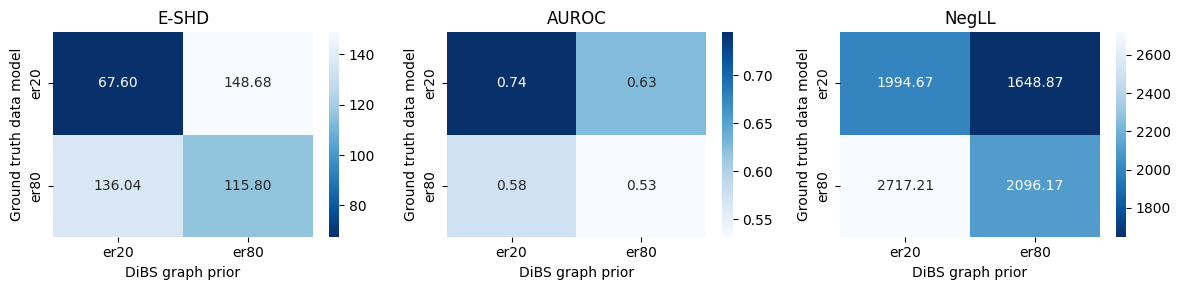

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data for heatmap visualization
e1_pivot_es = e1_results.pivot_table(index="Data Type", columns="Graph Model", values="ESHD")
e1_pivot_auroc = e1_results.pivot_table(index="Data Type", columns="Graph Model", values="AUROC")
e1_pivot_negll = e1_results.pivot_table(index="Data Type", columns="Graph Model", values="NegLL")

# Create heatmaps
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

sns.heatmap(e1_pivot_es, annot=True, fmt=".2f", cmap="Blues_r", ax=axes[0])
axes[0].set_title('E-SHD')
axes[0].set_ylabel('Ground truth data model')
axes[0].set_xlabel('DiBS graph prior')

sns.heatmap(e1_pivot_auroc, annot=True, fmt=".2f", cmap="Blues", ax=axes[1])
axes[1].set_title('AUROC')
axes[1].set_ylabel('Ground truth data model')
axes[1].set_xlabel('DiBS graph prior')

sns.heatmap(e1_pivot_negll, annot=True, fmt=".2f", cmap="Blues_r", ax=axes[2])
axes[2].set_title('NegLL')
axes[2].set_ylabel('Ground truth data model')
axes[2].set_xlabel('DiBS graph prior')

plt.tight_layout()

# Save the plot as an SVG file
plt.savefig("e1_results_heatmap.svg", format="svg")

plt.show()


In [6]:
from math import comb

# Given values
q = 0.8
d = 20

# Calculate the binomial coefficient and the final result
binomial_coefficient = comb(d, 2)
result = q * binomial_coefficient

print(f"q * binom({d}, 2) = {result}")


q * binom(20, 2) = 152.0


## E2: Variability of Edge Inclusion for Different Sample Sizes

In [7]:
e2_results = pd.read_csv("experiment_results/e2_results.csv")

# Convert the 'edge_freq' column from JSON strings back into numpy arrays
e2_results['edge_freq'] = e2_results['edge_freq'].apply(lambda x: np.array(json.loads(x)))

e2_results.info()
e2_results.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dibs_iteration  30 non-null     int64  
 1   n_observations  30 non-null     int64  
 2   edge_freq       30 non-null     object 
 3   ESHD            30 non-null     float64
 4   AUROC           30 non-null     float64
 5   NegLL           30 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.5+ KB


,dibs_iteration,n_observations,edge_freq,ESHD,AUROC,NegLL
0,1,10,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.30000001192092896...",44.899994,0.615931,201.91370
1,1,100,"[[0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.4...",44.400005,0.920751,937.33203
2,1,1000,"[[0.0, 0.0, 0.05000000074505806, 0.05000000074...",55.149986,0.935336,6380.08540
3,2,10,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.349999994039...",45.699997,0.610391,201.16140
4,2,100,"[[0.0, 0.0, 0.10000000149011612, 0.0, 0.050000...",46.349995,0.897684,951.21980


Matrix Shapes:
[(20, 20)]
Shape of matrices for n_observations=10: (10, 20, 20)
Shape of matrices for n_observations=100: (10, 20, 20)
Shape of matrices for n_observations=1000: (10, 20, 20)
Shape of mean and std matrices:
n_observations=10 - Mean shape: (20, 20), Std shape: (20, 20)
n_observations=100 - Mean shape: (20, 20), Std shape: (20, 20)
n_observations=1000 - Mean shape: (20, 20), Std shape: (20, 20)


/var/folders/qy/nd4dhjwd1bzfv6sz65bz5xg80000gn/T/ipykernel_8334/2374809199.py:62: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


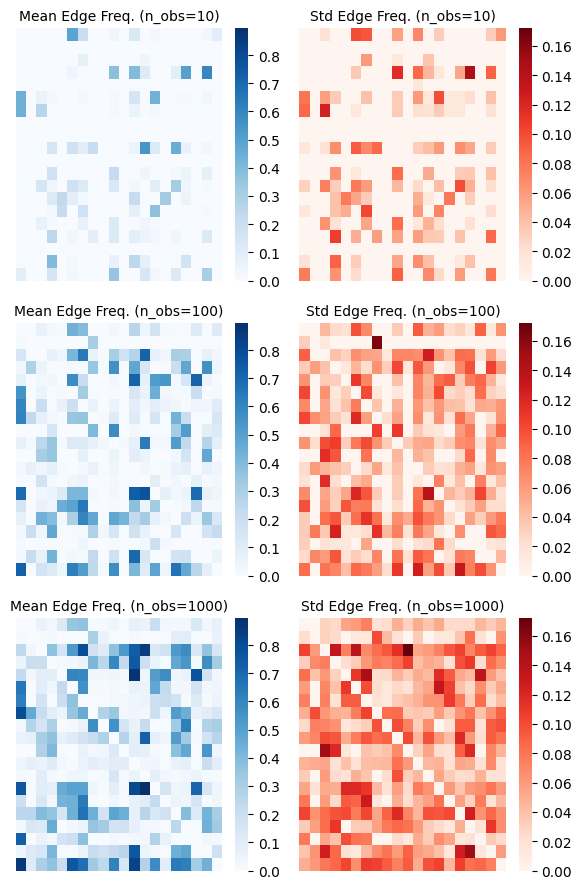

In [24]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
e2_results = pd.read_csv("experiment_results/e2_results.csv")

# Convert the 'edge_freq' column from JSON strings back into numpy arrays
e2_results['edge_freq'] = e2_results['edge_freq'].apply(lambda x: np.array(json.loads(x)))

# Verify if matrices are 20x20
print("Matrix Shapes:")
print(e2_results["edge_freq"].apply(lambda x: x.shape).unique())  # Check unique shapes

# Initialize containers for mean and std matrices
mean_matrices = {}
std_matrices = {}

# Compute mean and std for each n_observations group
for n_obs in [10, 100, 1000]:
    group = e2_results[e2_results["n_observations"] == n_obs]  # Filter rows by n_observations
    matrices = np.array(group["edge_freq"].tolist())  # Collect all matrices as a 3D array
    # Verify the shape of matrices before calculating mean and std
    print(f"Shape of matrices for n_observations={n_obs}: {matrices.shape}")
    
    # Calculate mean and std matrices
    mean_matrices[n_obs] = np.mean(matrices, axis=0)
    std_matrices[n_obs] = np.std(matrices, axis=0)

# Verify that the resulting mean and std matrices are 2D arrays
print("Shape of mean and std matrices:")
for n_obs in [10, 100, 1000]:
    print(f"n_observations={n_obs} - Mean shape: {mean_matrices[n_obs].shape}, Std shape: {std_matrices[n_obs].shape}")

# Get the common color scale limits for both mean and std
min_mean = min(np.min(mean_matrices[n_obs]) for n_obs in [10, 100, 1000] )
max_mean = max(np.max(mean_matrices[n_obs]) for n_obs in [10, 100, 1000] )

min_std = min(np.min(std_matrices[n_obs]) for n_obs in [10, 100, 1000] )
max_std = max(np.max(std_matrices[n_obs]) for n_obs in [10, 100, 1000] )

# Visualize the heatmaps
fig, axes = plt.subplots(3, 2, figsize=(6, 9))

for idx, n_obs in enumerate([10, 100, 1000]):
    # Mean heatmap
    sns.heatmap(mean_matrices[n_obs], ax=axes[idx, 0], cmap="Blues", cbar=True, vmin=min_mean, vmax=max_mean)
    axes[idx, 0].set_title(f"Mean Edge Freq. (n_obs={n_obs})", fontsize=10)
    axes[idx, 0].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    
    # Std heatmap
    sns.heatmap(std_matrices[n_obs], ax=axes[idx, 1], cmap="Reds", cbar=True, vmin=min_std, vmax=max_std)
    axes[idx, 1].set_title(f"Std Edge Freq. (n_obs={n_obs})", fontsize=10)
    axes[idx, 1].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)


# Adjust layout
fig.tight_layout()
fig.savefig("experiment_viz/e2_mean_std_matrices.svg", format="svg")
fig.show()

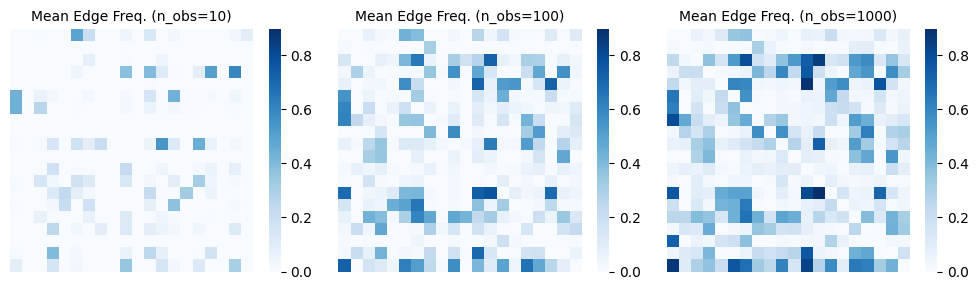

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the common color scale for all mean matrices
min_mean = min(np.min(mean_matrices[n_obs]) for n_obs in [10, 100, 1000])
max_mean = max(np.max(mean_matrices[n_obs]) for n_obs in [10, 100, 1000])

# Create a figure to plot heatmaps
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for idx, n_obs in enumerate([10, 100, 1000]):
    # Plot heatmap for mean matrix
    sns.heatmap(
        mean_matrices[n_obs],
        ax=axes[idx],
        cmap="Blues",
        cbar=True,
        vmin=min_mean,
        vmax=max_mean
    )
    axes[idx].set_title(f"Mean Edge Freq. (n_obs={n_obs})", fontsize=10)
    axes[idx].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

# Adjust layout and show the heatmaps
plt.tight_layout()
plt.show()

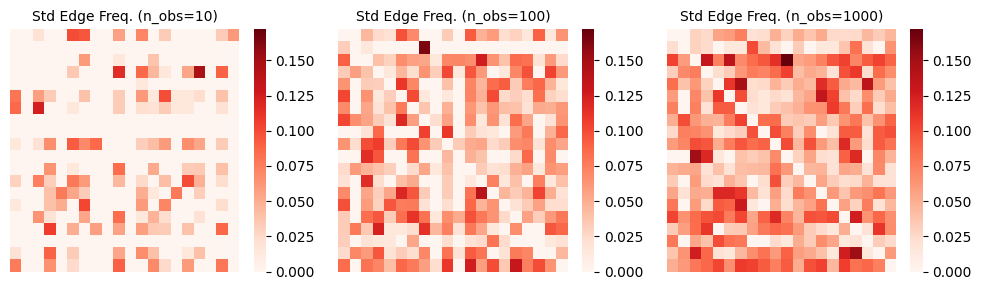

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the common color scale for all std matrices
min_std = min(np.min(std_matrices[n_obs]) for n_obs in [10, 100, 1000])
max_std = max(np.max(std_matrices[n_obs]) for n_obs in [10, 100, 1000])

# Create a figure to plot heatmaps
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for idx, n_obs in enumerate([10, 100, 1000]):
    # Plot heatmap for std matrix
    sns.heatmap(
        std_matrices[n_obs],
        ax=axes[idx],
        cmap="Reds",
        cbar=True,
        vmin=min_std,
        vmax=max_std
    )
    axes[idx].set_title(f"Std Edge Freq. (n_obs={n_obs})", fontsize=10)
    axes[idx].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

# Adjust layout and show the heatmaps
plt.tight_layout()
plt.show()

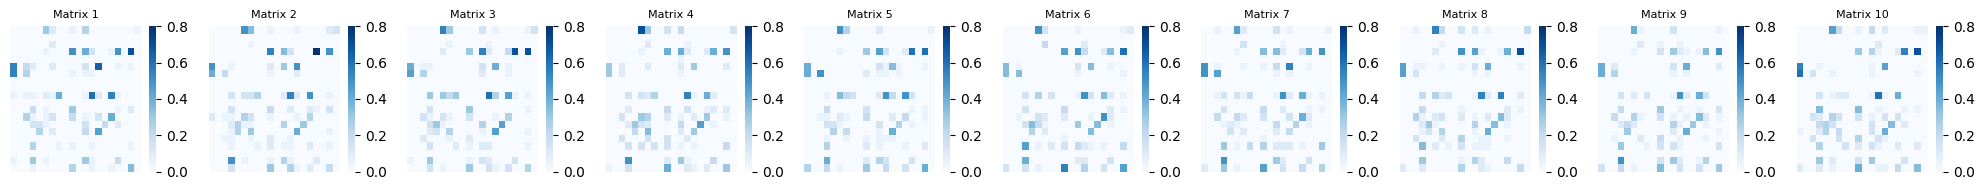

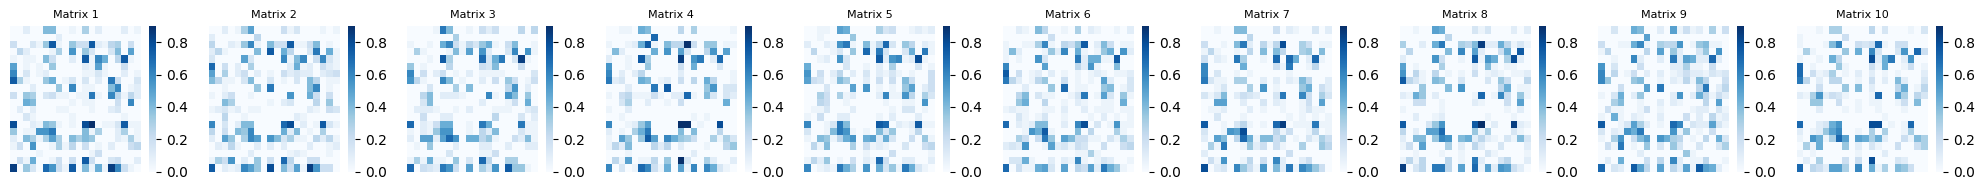

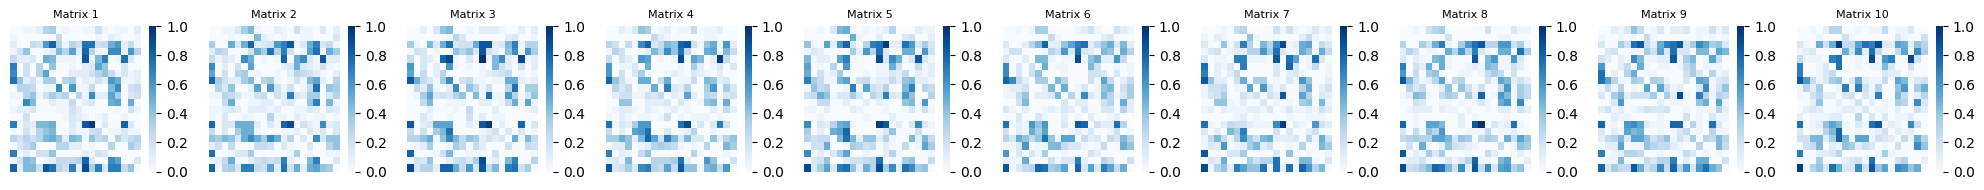

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def visualize_base_matrices(n_obs, e2_results):
    """
    Visualizes the base edge frequency matrices for a given n_observations.
    
    Parameters:
    n_obs (int): The number of observations (e.g., 10, 100, 1000).
    e2_results (pd.DataFrame): The DataFrame containing the 'edge_freq' column.
    
    Returns:
    fig (matplotlib.figure.Figure): The figure object with the plotted heatmaps.
    """
    # Filter rows by n_observations and get the matrices
    group = e2_results[e2_results["n_observations"] == n_obs]
    matrices = np.array(group["edge_freq"].tolist())  # Collect all matrices as a 3D array
    
    # Get the min and max values across all matrices to use for scaling
    min_val = np.min(matrices)
    max_val = np.max(matrices)
    
    # Create a figure to plot the heatmaps
    fig, axes = plt.subplots(1, 10, figsize=(20, 2), sharex=True, sharey=True)
    
    for i, matrix in enumerate(matrices):
        # Plot each base matrix in a heatmap
        sns.heatmap(
            matrix,
            ax=axes[i],  # Assign each subplot to a matrix
            cmap="Blues",
            cbar=True,
            vmin=min_val, vmax=max_val
        )
        axes[i].set_title(f"Matrix {i+1}", fontsize=8)
        axes[i].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    # Adjust layout and display the heatmaps
    plt.tight_layout()
    return fig

# Example usage
fig = visualize_base_matrices(10, e2_results)
plt.show()

fig = visualize_base_matrices(100, e2_results)
plt.show()

fig = visualize_base_matrices(1000, e2_results)
plt.show()



Matrix Shapes:
[(20, 20)]
Shape of matrices for n_observations=10: (10, 20, 20)
Shape of matrices for n_observations=100: (10, 20, 20)
Shape of matrices for n_observations=1000: (10, 20, 20)

Mean Entropy Values:
n_observations=10: Mean Entropy = 1.9064
n_observations=100: Mean Entropy = 1.9059
n_observations=1000: Mean Entropy = 2.2797

Mutual Information Values:
n_observations=10: Mutual Information = 0.4201
n_observations=100: Mutual Information = 0.4604
n_observations=1000: Mutual Information = 0.5551


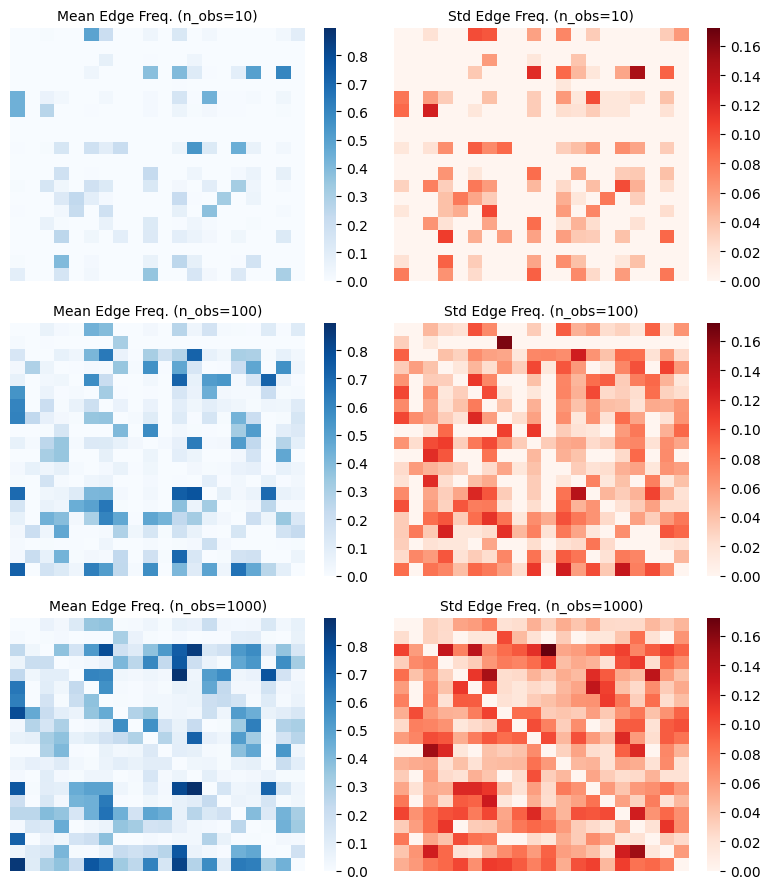

In [12]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mutual_info_score

# Load the CSV file into a DataFrame
e2_results = pd.read_csv("experiment_results/e2_results.csv")

# Convert the 'edge_freq' column from JSON strings back into numpy arrays
e2_results['edge_freq'] = e2_results['edge_freq'].apply(lambda x: np.array(json.loads(x)))

# Verify if matrices are 20x20
print("Matrix Shapes:")
print(e2_results["edge_freq"].apply(lambda x: x.shape).unique())  # Check unique shapes

# Initialize containers for mean, std matrices, entropy, and mutual information
mean_matrices = {}
std_matrices = {}
mean_entropy_values = {}
mutual_information_values = {}

# Function to compute mean entropy across 10 runs
def compute_mean_entropy(matrices):
    entropies = []
    for matrix in matrices:
        # Handle division by zero
        matrix_sum = matrix.sum(axis=1, keepdims=True)
        matrix_sum[matrix_sum == 0] = 1  # Avoid division by zero
        matrix = matrix / matrix_sum

        matrix_entropy = [entropy(row + 1e-10) for row in matrix]  # Small epsilon for log(0)
        entropies.append(np.mean(matrix_entropy))
    return np.mean(entropies)

# Function to compute mutual information across runs
def compute_mutual_information(matrices):
    flattened_matrices = matrices.reshape(matrices.shape[0], -1)  # Flatten each matrix

    # Remove constant columns to avoid warnings
    non_constant_cols = np.ptp(flattened_matrices, axis=0) > 0
    filtered_data = flattened_matrices[:, non_constant_cols]

    discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
    discretized_data = discretizer.fit_transform(filtered_data)

    mi_scores = []
    for i in range(discretized_data.shape[1]):
        for j in range(i + 1, discretized_data.shape[1]):
            mi_scores.append(mutual_info_score(discretized_data[:, i], discretized_data[:, j]))

    return np.mean(mi_scores)

# Compute statistics for each n_observations group
for n_obs in [10, 100, 1000]:
    group = e2_results[e2_results["n_observations"] == n_obs]  # Filter rows by n_observations
    matrices = np.array(group["edge_freq"].tolist())  # Collect all matrices as a 3D array
    
    # Verify the shape of matrices before calculating statistics
    print(f"Shape of matrices for n_observations={n_obs}: {matrices.shape}")
    
    # Calculate mean and std matrices
    mean_matrices[n_obs] = np.mean(matrices, axis=0)
    std_matrices[n_obs] = np.std(matrices, axis=0)
    
    # Calculate mean entropy
    mean_entropy_values[n_obs] = compute_mean_entropy(matrices)

    # Calculate mutual information
    mutual_information_values[n_obs] = compute_mutual_information(matrices)

# Print results
print("\nMean Entropy Values:")
for n_obs, entropy_val in mean_entropy_values.items():
    print(f"n_observations={n_obs}: Mean Entropy = {entropy_val:.4f}")

print("\nMutual Information Values:")
for n_obs, mi_val in mutual_information_values.items():
    print(f"n_observations={n_obs}: Mutual Information = {mi_val:.4f}")

# Visualization
min_mean = min(np.min(mean_matrices[n_obs]) for n_obs in [10, 100, 1000])
max_mean = max(np.max(mean_matrices[n_obs]) for n_obs in [10, 100, 1000])

min_std = min(np.min(std_matrices[n_obs]) for n_obs in [10, 100, 1000])
max_std = max(np.max(std_matrices[n_obs]) for n_obs in [10, 100, 1000])

fig, axes = plt.subplots(3, 2, figsize=(8, 9))

for idx, n_obs in enumerate([10, 100, 1000]):
    sns.heatmap(mean_matrices[n_obs], ax=axes[idx, 0], cmap="Blues", cbar=True, vmin=min_mean, vmax=max_mean)
    axes[idx, 0].set_title(f"Mean Edge Freq. (n_obs={n_obs})", fontsize=10)
    axes[idx, 0].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    
    sns.heatmap(std_matrices[n_obs], ax=axes[idx, 1], cmap="Reds", cbar=True, vmin=min_std, vmax=max_std)
    axes[idx, 1].set_title(f"Std Edge Freq. (n_obs={n_obs})", fontsize=10)
    axes[idx, 1].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

plt.tight_layout()
plt.show()


Matrix Shapes:
[(20, 20)]
Mean Entropy Matrices (per sample size):
n_observations=10:
[[3.46619761e-09 3.46619761e-09 5.72793948e-02 3.46619761e-09
  3.46619761e-09 9.70463024e-01 6.78601268e-01 3.46619761e-09
  3.46619761e-09 2.07887154e-01 3.46619761e-09 5.30904345e-01
  3.46619761e-09 1.61458346e-01 3.46619761e-09 3.46619761e-09
  3.46619761e-09 3.46619761e-09 1.61458346e-01 4.16603250e-01]
 [3.46619761e-09 3.46619761e-09 3.46619761e-09 3.46619761e-09
  3.46619761e-09 3.46619761e-09 3.46619761e-09 3.46619761e-09
  3.46619761e-09 3.46619761e-09 3.46619761e-09 3.46619761e-09
  3.46619761e-09 3.46619761e-09 3.46619761e-09 3.46619761e-09
  3.46619761e-09 3.46619761e-09 3.46619761e-09 3.46619761e-09]
 [3.46619761e-09 3.46619761e-09 3.46619761e-09 3.46619761e-09
  3.46619761e-09 3.46619761e-09 3.59794610e-01 3.46619761e-09
  3.46619761e-09 2.86396991e-02 3.46619761e-09 3.46619761e-09
  2.08357905e-01 3.46619761e-09 3.46619761e-09 3.46619761e-09
  3.46619761e-09 3.46619761e-09 3.46619761e-

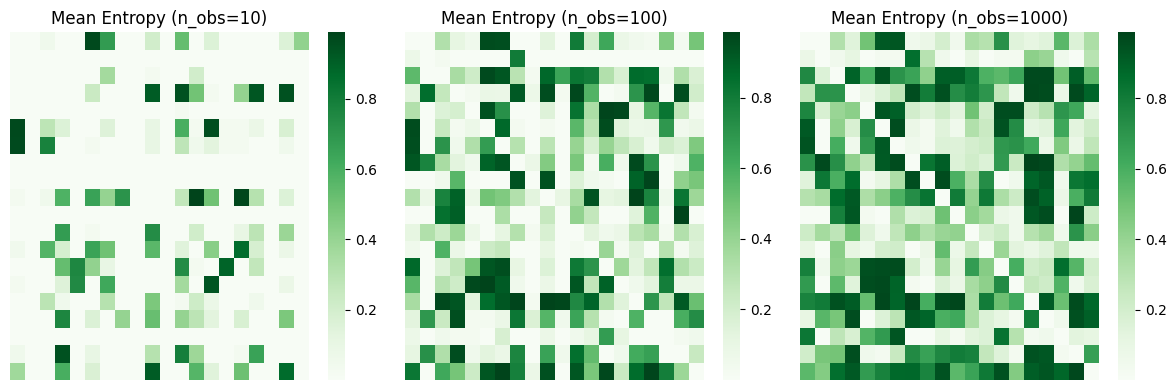

In [13]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
e2_results = pd.read_csv("experiment_results/e2_results.csv")

# Convert the 'edge_freq' column from JSON strings back into numpy arrays
e2_results['edge_freq'] = e2_results['edge_freq'].apply(lambda x: np.array(json.loads(x)))

# Verify if matrices are 20x20
print("Matrix Shapes:")
print(e2_results["edge_freq"].apply(lambda x: x.shape).unique())  # Check unique shapes

# Function to calculate entropy for each edge (i, j) using p and (1-p)
def edge_entropy(p, epsilon=1e-10):
    p = np.clip(p, epsilon, 1 - epsilon)  # Avoid log(0)
    return - (p * np.log2(p) + (1 - p) * np.log2(1 - p))

# Initialize dictionary for mean entropy matrices
mean_entropy_matrices = {}

# Compute entropy for each n_observations group
for n_obs in [10, 100, 1000]:
    group = e2_results[e2_results["n_observations"] == n_obs]  # Filter rows by n_observations
    matrices = np.array(group["edge_freq"].tolist())  # Collect all matrices as a 3D array (10, 20, 20)

    # Calculate entropy for each edge in each run
    entropy_matrices = edge_entropy(matrices)  # Apply entropy formula element-wise

    # Average the entropy matrices over the 10 runs
    mean_entropy_matrices[n_obs] = np.mean(entropy_matrices, axis=0)

# Print the mean entropy matrices
print("Mean Entropy Matrices (per sample size):")
for n_obs, matrix in mean_entropy_matrices.items():
    print(f"n_observations={n_obs}:")
    print(matrix)

# Calculate the mean of all mean entropy values
overall_mean_entropy = {n_obs: np.mean(matrix) for n_obs, matrix in mean_entropy_matrices.items()}

# Print the overall mean entropy values
print("\nOverall Mean Entropy across all edges:")
for n_obs, mean_entropy in overall_mean_entropy.items():
    print(f"n_observations={n_obs}: {mean_entropy:.4f}")

# Visualize the mean entropy matrices
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for idx, n_obs in enumerate([10, 100, 1000]):
    sns.heatmap(mean_entropy_matrices[n_obs], ax=axes[idx], cmap="Greens", cbar=True)
    axes[idx].set_title(f"Mean Entropy (n_obs={n_obs})")
    axes[idx].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

plt.tight_layout()
plt.show()


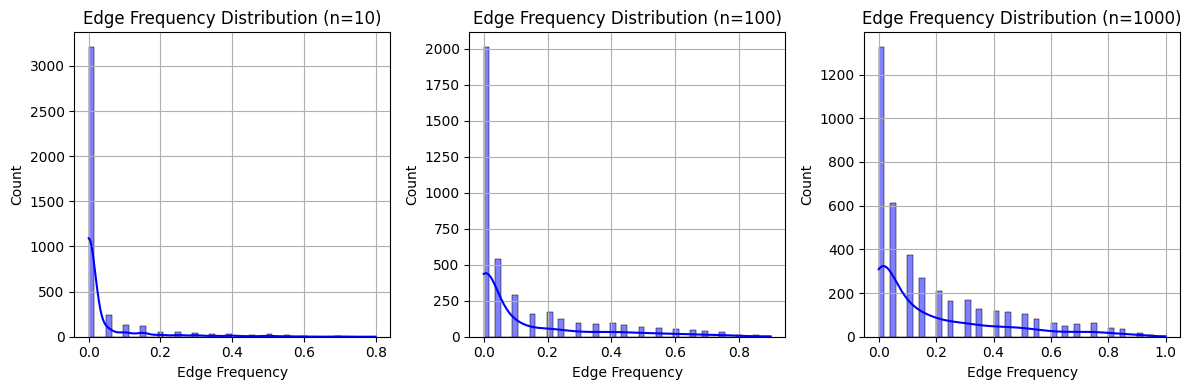

In [14]:
# Flatten edge frequency matrices for each sample size separately
edge_frequencies_by_n = {}

for n_obs in [10, 100, 1000]:
    group = e2_results[e2_results["n_observations"] == n_obs]  # Filter rows by n_observations
    matrices = np.array(group["edge_freq"].tolist())  # Collect all matrices as a 3D array (10, 20, 20)
    flattened_values = matrices.flatten()  # Flatten all edge frequencies into a 1D array
    edge_frequencies_by_n[n_obs] = flattened_values

# Plot distributions separately for n = 10, 100, 1000
plt.figure(figsize=(12, 4))

for idx, n_obs in enumerate([10, 100, 1000]):
    plt.subplot(1, 3, idx + 1)
    sns.histplot(edge_frequencies_by_n[n_obs], bins=50, kde=True, color='blue', edgecolor='black')
    plt.title(f"Edge Frequency Distribution (n={n_obs})")
    plt.xlabel("Edge Frequency")
    plt.ylabel("Count")
    plt.grid(True)

plt.tight_layout()
plt.savefig("experiment_viz/e2_edge_freq_distributions.svg", format="svg")
plt.show()


In [15]:
# Calculate the mean of ESHD, AUROC, and NegLL for each n_observations group
metrics = ["ESHD", "AUROC", "NegLL"]
mean_scores = e2_results.groupby("n_observations")[metrics].mean()

# Print the mean scores for each group
print("\nMean ESHD, AUROC, and NegLL for n_observations = 10, 100, 1000:")
for n_obs in [10, 100, 1000]:
    eshd_mean = mean_scores.loc[n_obs, "ESHD"]
    auroc_mean = mean_scores.loc[n_obs, "AUROC"]
    negll_mean = mean_scores.loc[n_obs, "NegLL"]
    
    print(f"n_observations={n_obs}:")
    print(f"  Mean ESHD: {eshd_mean:.4f}")
    print(f"  Mean AUROC: {auroc_mean:.4f}")
    print(f"  Mean NegLL: {negll_mean:.4f}")



Mean ESHD, AUROC, and NegLL for n_observations = 10, 100, 1000:
n_observations=10:
  Mean ESHD: 45.0100
  Mean AUROC: 0.6423
  Mean NegLL: 201.5903
n_observations=100:
  Mean ESHD: 44.3350
  Mean AUROC: 0.9179
  Mean NegLL: 936.7932
n_observations=1000:
  Mean ESHD: 50.8300
  Mean AUROC: 0.9551
  Mean NegLL: 6343.2707


/var/folders/qy/nd4dhjwd1bzfv6sz65bz5xg80000gn/T/ipykernel_8334/1062212241.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


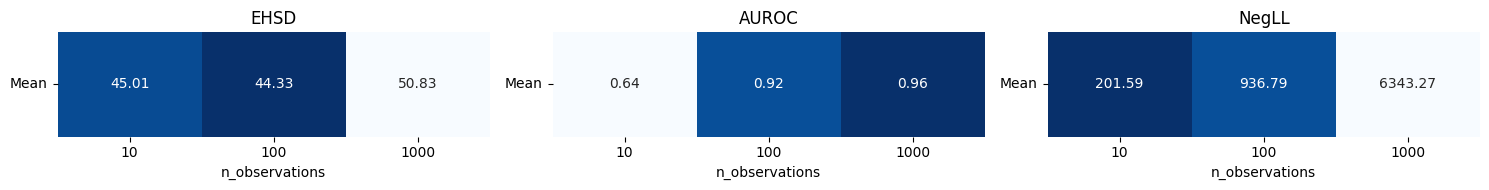

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv("experiment_results/e2_results.csv")

# Parse the 'dibs_iteration' column to group by it
df['dibs_iteration'] = df['dibs_iteration'].astype(int)

# Create a pivot table for each metric (EHSD, AUROC, NegLL) with 'n_observations' as columns
pivot_EHSD = df.pivot_table(values='ESHD', index='dibs_iteration', columns='n_observations', aggfunc='mean')
pivot_AUROC = df.pivot_table(values='AUROC', index='dibs_iteration', columns='n_observations', aggfunc='mean')
pivot_NegLL = df.pivot_table(values='NegLL', index='dibs_iteration', columns='n_observations', aggfunc='mean')

# Set up the figure and axes for the heatmap
fig, axes = plt.subplots(1, 3, figsize=(15, 2))

# Create heatmaps for each metric
sns.heatmap(pivot_EHSD.mean(axis=0).to_frame().T, annot=True, fmt='.2f', cmap='Blues_r', ax=axes[0], cbar=False)
axes[0].set_title('EHSD')
axes[0].set_xticklabels(['10', '100', '1000'])
axes[0].set_yticklabels(["Mean"], rotation=0)

sns.heatmap(pivot_AUROC.mean(axis=0).to_frame().T, annot=True, fmt='.2f', cmap='Blues', ax=axes[1], cbar=False)
axes[1].set_title('AUROC')
axes[1].set_xticklabels(['10', '100', '1000'])
axes[1].set_yticklabels(["Mean"], rotation=0)

sns.heatmap(pivot_NegLL.mean(axis=0).to_frame().T, annot=True, fmt='.2f', cmap='Blues_r', ax=axes[2], cbar=False)
axes[2].set_title('NegLL')
axes[2].set_xticklabels(['10', '100', '1000'])
axes[2].set_yticklabels(["Mean"], rotation=0)

# Adjust layout
fig.tight_layout()
fig.savefig("experiment_viz/e2_results_heatmap.svg", format="svg")
fig.show()